# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [13]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

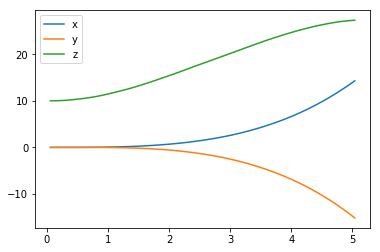

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

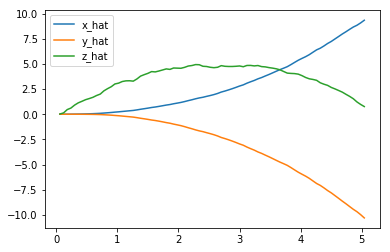

In [15]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

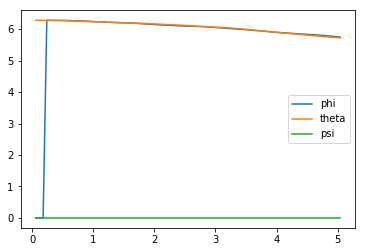

In [16]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

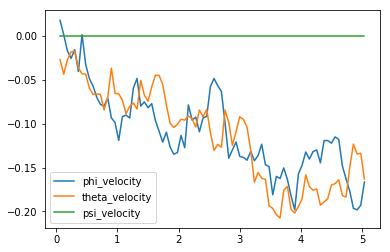

In [17]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

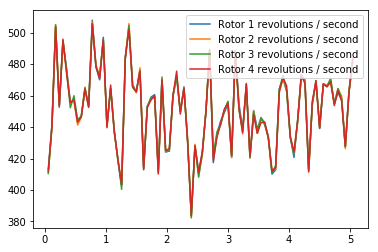

In [18]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [19]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 14.28125854 -15.13556426  27.29124984   5.74693865   5.72495536   0.        ]
[  9.3480326  -10.31021867   0.76431369]
[-0.16652463 -0.16313094  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [20]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -4.071 (best =   0.236), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
# Import the agent and taks etc.

from agents.agent import DDPG
import numpy as np
import sys
import pandas as pd
from task import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


Using TensorFlow backend.


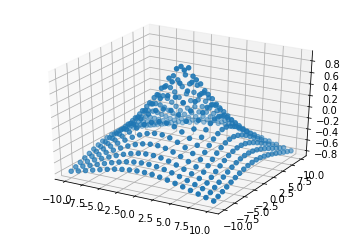

In [2]:
# Map the reward function used in the task class
# Map the values in the plane of z = 10m

# The reward function uses the Euler distance from target position. 0 at the target and increasing further away
# Reward in Task is -np.tanh(0.2*np.linalg.norm(self.sim.pose[:3] - self.target_pos))
# The distance is passed through tanh so that reward is limited to max of -1 to help prevent gradients from exploding.
def reward_func(x, y):
    return 1-2*np.tanh(0.1*np.sqrt(x ** 2 + y ** 2)) 
        

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)
Z = np.array(reward_func(X, Y))

test = np.array([0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
plt.show()

### First attempt. See how it goes, check outputs and update network

In [3]:
## TODO: Train your agent here.

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 10, 0.0, 0.0, 0.0])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.random.randn(3)*0.05))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

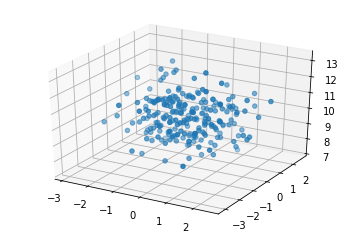

In [4]:
# Plot the starting points to see if there will be a spread of data around the target point in the memory buffer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_start, y_start, z_start)
plt.show()

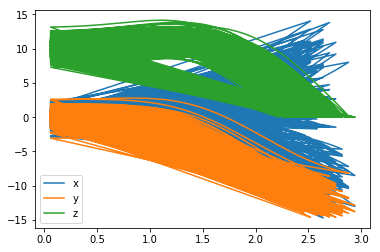

In [5]:
# Check the trajectories of the test flights

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

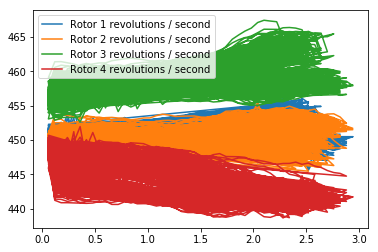

In [6]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

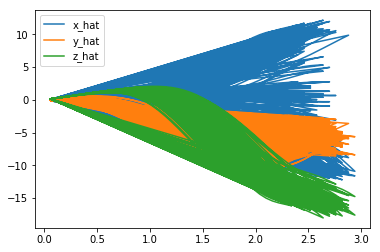

In [7]:

plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

In [8]:
# Now that the memory buffer has been populated with random start points it is time to train the model

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   1.292

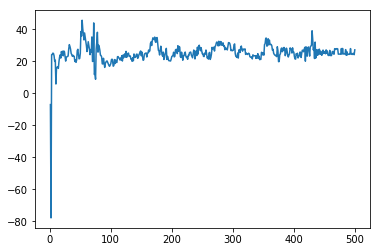

In [9]:
#Plot the training data

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episodes, total_rewards)

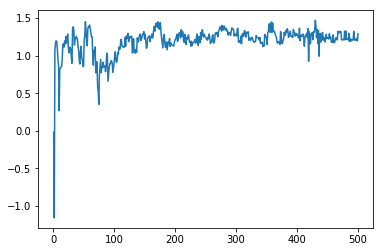

In [10]:
plt.plot(episodes, final_score)

## Now to evaluate a run of the quadcopter to see how it goes after 500 episodes.

In [11]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break


Episode =    0, score =   1.264

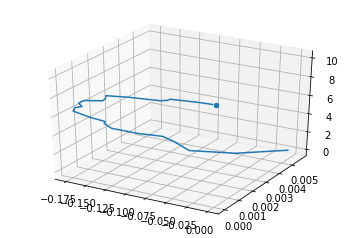

In [12]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

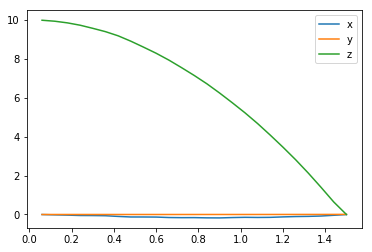

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

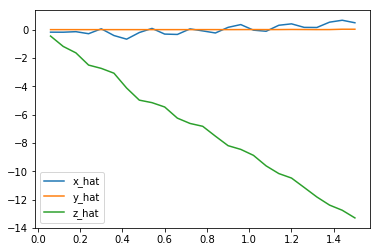

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

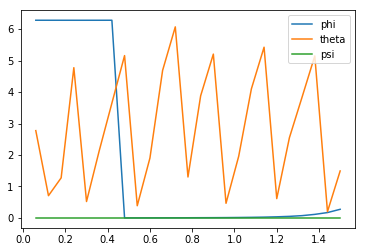

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

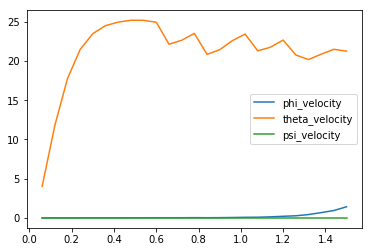

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

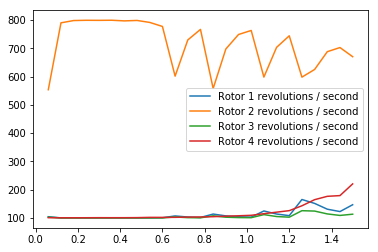

In [17]:


plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

From the above metrics the quadcopter plunges to the ground in 1.5 seconds, but it looks like it is due to 3 of the 4 rotors being completedly dead.

I will try another round of training and see if the performance improves.

### Now to try more episodes of training

In [18]:
total_rewards = []
episodes = []
final_score = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   1.316

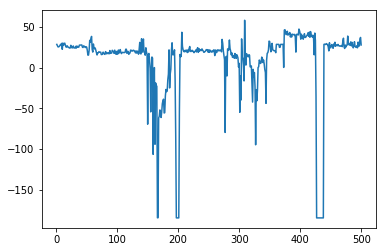

In [19]:
#Plot the training data

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episodes, total_rewards)

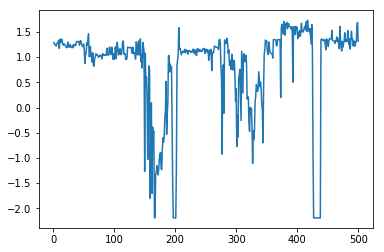

In [20]:
plt.plot(episodes, final_score)

In [21]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   1.325

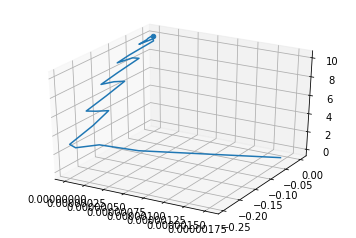

In [22]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

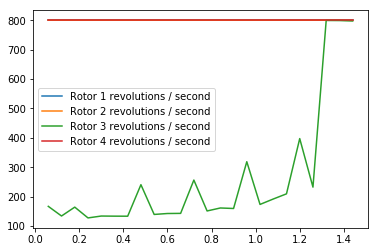

In [23]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [24]:
total_rewards = []
episodes = []
final_score = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   1.094

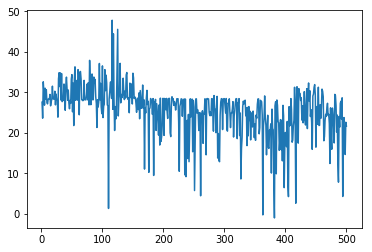

In [25]:
#Plot the training data

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episodes, total_rewards)

In [26]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   0.554

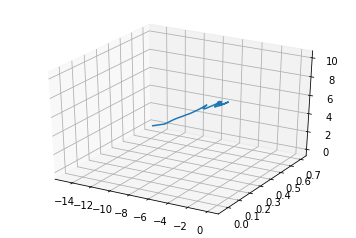

In [27]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

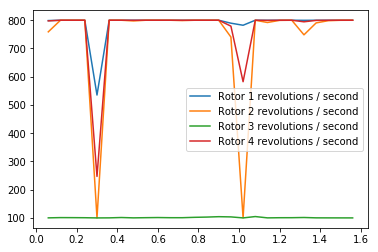

In [28]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Summary from first pass at training and first attempt.

Prior to this run I had experimented with various reward functions and net architectures, but these weren't captured in my notebook. I have saved this latest run as my first as it is my first run that wasn't just to experiment with inputs and outputs etc.

In this network the rotor speed values (actions) explode either to max or min value, with nothing in between.

#### Updaye to the network

Changes made to the network include:
 - Applying batch norm to the input states to normalise the values before they enter the neural net.
 - Normalise the actions before they enter the neural net
 - Have the actor output the raw_actions [-1, 1] instead of the full action values.
 - Apply the action gradients to the raw_action values.
 - Now that the actor outputs the raw_values I need to upscale the raw_actions to actions after they leave the actor network and before they are input into the critic and memory buffer etc.
 - Clip the gradients in the optimizers in the neural nets to stop gradient blowout.
 
I also discovered a slight error in one of my nets where one section was being skipped. Hopefully with the update performance is improved.

In [1]:
# Import the agent and taks etc.

from agents.agent import DDPG
import numpy as np
import sys
import pandas as pd
from task import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [3]:
## TODO: Train your agent here.

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 10, 0.0, 0.0, 0.0])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()
task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.zeros(3)))

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.zeros(3)))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

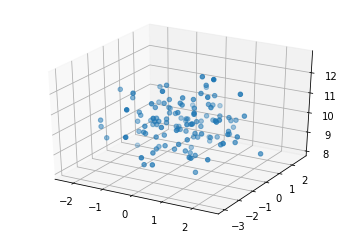

In [4]:
# Plot the starting points to see if there will be a spread of data around the target point in the memory buffer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_start, y_start, z_start)
plt.show()

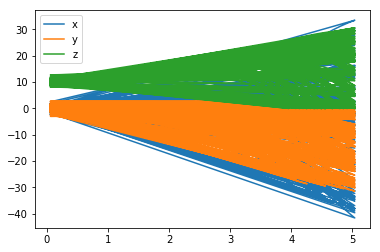

In [5]:
# Check the trajectories of the test flights

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The starting positions appear to be correct with the starting points all starting normalised around 0 in the x and y and normalised around 10m in the z poistion.

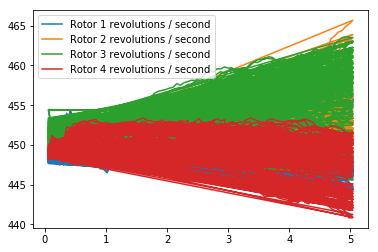

In [6]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

The rotor speeds all appear to be roughly correct. The initial actions should all come out around 0 out of the net which is equivalent to rotor speed of 450. These initial rotor speeds look good.

In [7]:
# Now that the memory buffer has been populated with random start points it is time to train the model

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.zeros(3)))
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   1.043

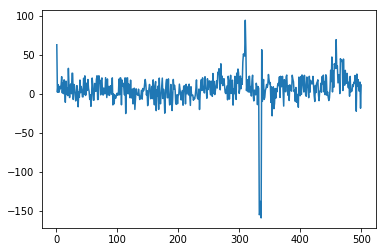

In [8]:
#Plot the training data

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episodes, total_rewards)

In [9]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   1.329

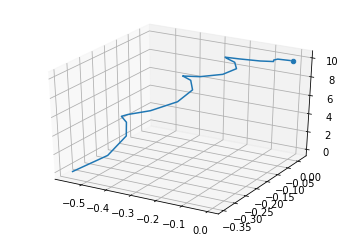

In [10]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

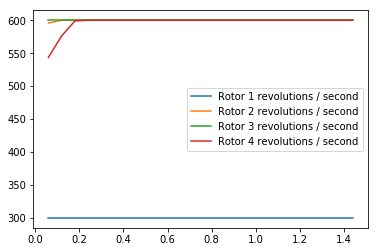

In [11]:


plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

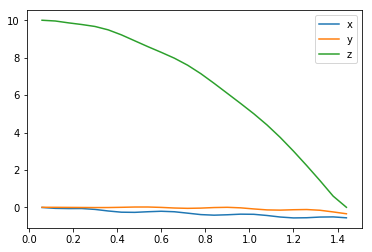

In [12]:

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [13]:
num_episodes = 1000 # Try a longer training run before evaluating the model again.

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.random.randn(3)*0.05))
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   1.344

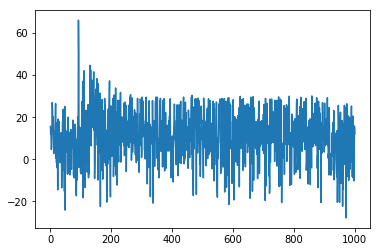

In [14]:
plt.plot(episodes, total_rewards)

In [15]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   1.225

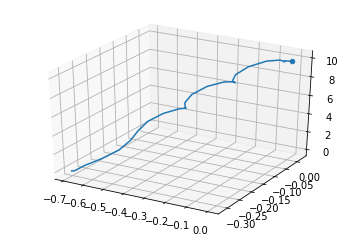

In [16]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

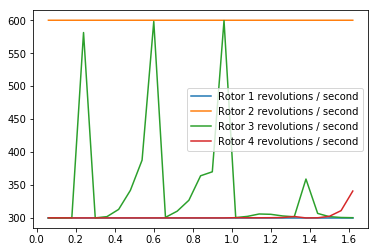

In [17]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [18]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.zeros(3)))
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   1.391

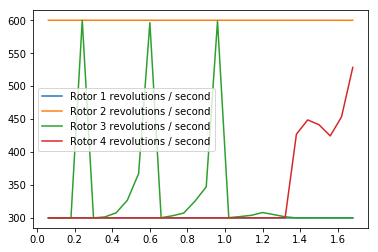

In [19]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Summary after second training run

After 1500 episodes of training the rotor speeds (actions) still seem to favour maxing out at full speed, or minimising out at lower action bound.

Another update to try:
 - to rectify this will be to output reduced actions from the network, less than the action bounds.

 - Try a elu activation.

 - Tighten up the action range
 
 - Square root the raw_actions to favour the middle of the range
 
 - Apply reward function only worried about z position
 
 - Add reward based on sim.time

In [1]:
# Import the agent and taks etc.

from agents.agent import DDPG
import numpy as np
import sys
import pandas as pd
from task import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
## TODO: Train your agent here.

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()
task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+10, np.zeros(3)))

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

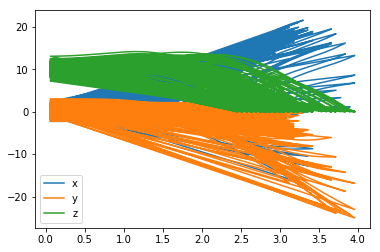

In [3]:
# Check the trajectories of the test flights

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

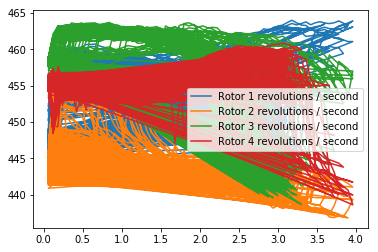

In [4]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [5]:
# Now that the memory buffer has been populated with random start points it is time to train the model

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   5.165

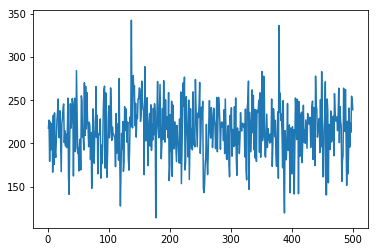

In [6]:
plt.plot(episodes, total_rewards)

In [7]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   2.077

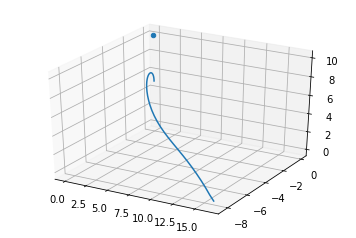

In [8]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

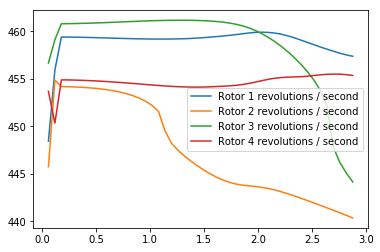

In [9]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

##### From this run the quadcopter does a lot better as the rotor speeds are no longer MAX and MIN, but are occupying more of the middle grouind. The transitions of rotor speeds also do not jump around sharply as they did previously, but appear to transition smoothly between values.

In [10]:
num_episodes = 1000 # Try a longer training run before evaluating the model again.

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   2.748

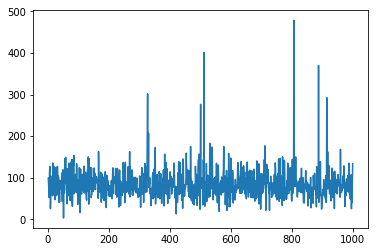

In [11]:
plt.plot(episodes, total_rewards)

In [16]:
eval_rewards = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            final_score.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            break

Episode =    0, score =   2.077

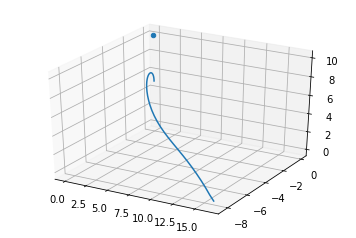

In [17]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

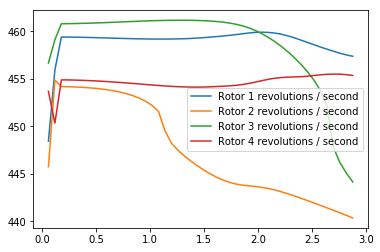

In [18]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

Oddly the latest evaluation appears to be identical to the previous which suggests no learning for some reason.

### Try reverting to an earlier set of agent, actor task.

 - Try using clipnorm in the optimizer instead of clip 0.5

In [1]:
# Import the agent and taks etc.

from agents.agent_redo import DDPG
import numpy as np
import sys
import pandas as pd
from task_redo import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
## TODO: Train your agent here.

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()
task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

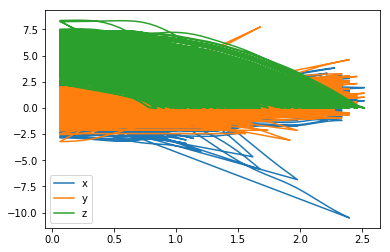

In [3]:
# Check the trajectories of the test flights

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

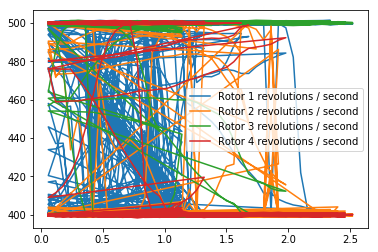

In [4]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

This shows that the rotor speeds are just bouncing around between max values.

This suggests that the values coming out are large.

I will update the final layer kernal initializer to be small random normal -0.03 and 0.03

In [1]:
# Import the agent and taks etc.

from agents.agent_redo import DDPG
import numpy as np
import sys
import pandas as pd
from task_redo import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
## TODO: Train your agent here.

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()
task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

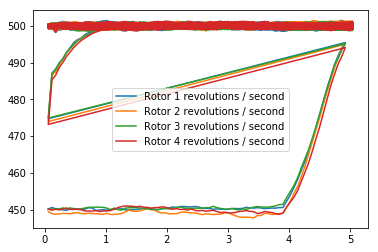

In [3]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [4]:
# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
#             total_rewards.append(agent.reward)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break

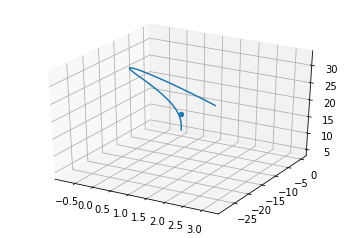

In [5]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

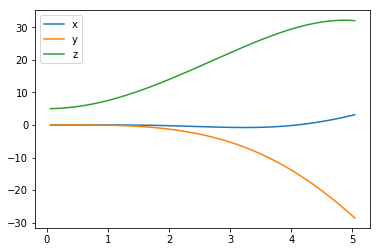

In [6]:
# Check the trajectories of the test flights

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

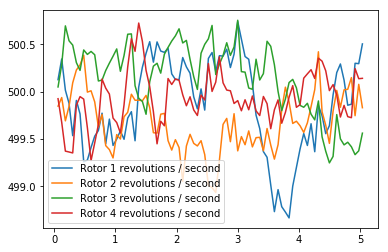

In [7]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

### Summary from this trial

Going back to the simpler model with sigmoid output and a tight action range has stabilised the outputs and flight of the Quadcopter significantly.

Adding self.sim.v[2] into the reward function encourages the quadcopter to zoom upwards rapidly. This means the quadcopter does not plunge into the local minimum of crashing and ending he episode. The quadcopter now does not crash and makes it through the full time allocation of 5 seconds.

This is sucessful, but not as satisfying as the original more difficult goal of hovering in one spot.

This shows that the stability of the quadcopter is strongly sensitive to variations in rotor speed, therefore incentivising vertical velocity incentivises full rotor speed in all the rotors and thereby also increasing quadcopter stability.

Now to try keeping the sim.v[2] only for the first second of the episode.

Now also try to go back to the euler distance of the point in space and not limit soley to the z dimension.

In [1]:
# Import the agent and taks etc.

from agents.agent_redo import DDPG
import numpy as np
import sys
import pandas as pd
from task_redo import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
    
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


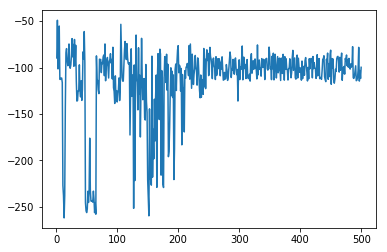

In [3]:
plt.plot(episodes, total_rewards)

In [4]:
# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

 
for i_episode in range(500, num_episodes+501):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749


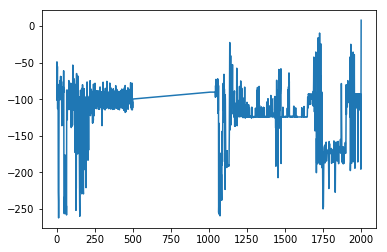

In [5]:
plt.plot(episodes, total_rewards)

In [4]:
# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Now train without the noise in the starting position

for i_episode in range(1001, num_episodes+1501):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


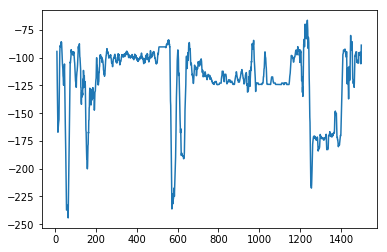

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
total_rewards_df= pd.DataFrame(total_rewards)
plt.plot(pd.rolling_mean(total_rewards_df, 10))

In [9]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
#             total_rewards.append(agent.reward)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break

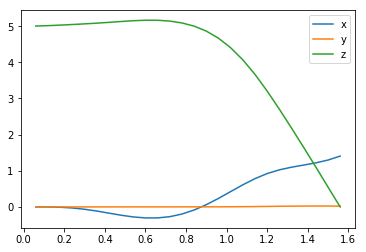

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

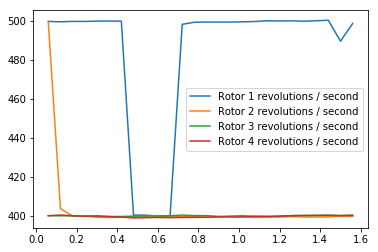

In [11]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

Once again as with earlier sessions, architectuers and attempts the rotor speeds go to min max.

In [1]:
# Import the agent and taks etc.

# Try going back to the DDPG paper network from the simpler course network

from agents.agent_b import DDPG
import numpy as np
import sys
import pandas as pd
from task_e import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
## Try swtching rewards to purely positive. No longer -tanh but tanh

# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 500 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

# Create lists to check/track the starting positions used when filling the memory buffer before training
x_start = []
y_start = []
z_start = []

# Reset to the starting state before populating a number of episodes on the replay buffer
state = agent.reset_episode()
task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))

# Start by populating the memory buffer with 10000 random explored steps
# Starting position is randomised -1m and 1m in x and y, 6m and 12m in z, and various small euler angles
for i in range(10000):
    action = agent.act(state)
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
    if done:
        state = agent.reset_episode()
        task.sim.pose = np.concatenate((np.random.randn(2), np.random.randn(1)+5, np.zeros(3)))
        x_start.append(task.sim.pose[0])
        y_start.append(task.sim.pose[1])
        z_start.append(task.sim.pose[2])
        state = np.concatenate([task.sim.pose] * task.action_repeat) 

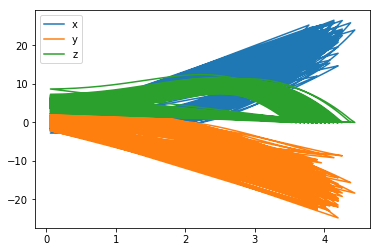

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

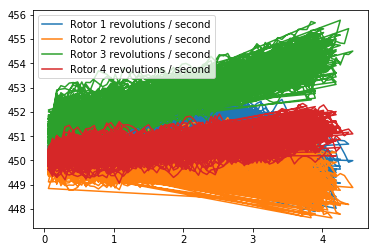

In [4]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [6]:
# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []
 
for i_episode in range(500, num_episodes+501):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


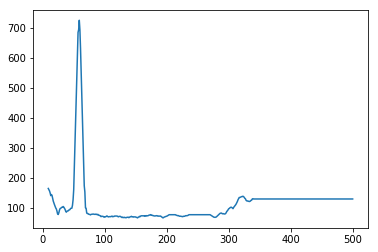

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
total_rewards_df= pd.DataFrame(total_rewards)
plt.plot(pd.rolling_mean(total_rewards_df, 10))

In [8]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
#             total_rewards.append(agent.reward)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break

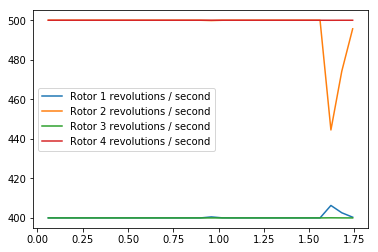

In [9]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

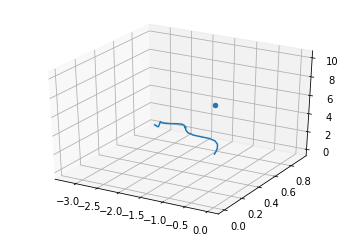

In [10]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

Try limiting reward to max of 1 again

In [1]:
# Import the agent and taks etc.

# Try going back to the DDPG paper network from the simpler course network

from agents.agent_b import DDPG
import numpy as np
import sys
import pandas as pd
from task_e import Task

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Set up labels and results list and dictionary to track episodes
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Set up parameters to track reward numbers against time or episodes
total_rewards = []
episodes = []
final_score = []

num_episodes = 1000 # Start with 500 training episodes and see how the agent does
target_pos = np.array([0., 0., 10.])
init_velocities = np.array([0., 0., 0.])
init_pose = np.array([0.0, 0.0, 5., 0.0, 0.0, 0.0])  # Try starting at 5m height and see if quad flys up to 10m
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)
 
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


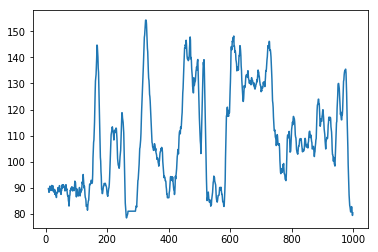

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
total_rewards_df= pd.DataFrame(total_rewards)
plt.plot(pd.rolling_mean(total_rewards_df, 10))

In [5]:
 
for i_episode in range(1001, 1501):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


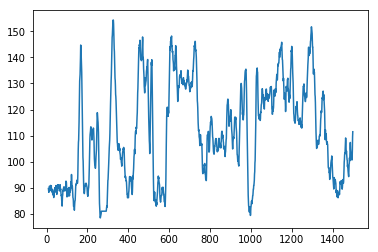

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
total_rewards_df= pd.DataFrame(total_rewards)
plt.plot(pd.rolling_mean(total_rewards_df, 10))

In [7]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
#             total_rewards.append(agent.reward)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break

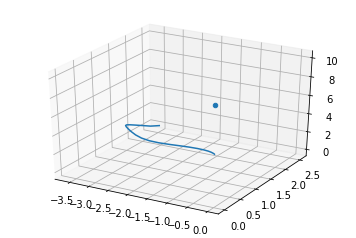

In [8]:
# Show in 3D the path of the quadcopter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'], results['y'], results['z'])
ax.scatter(target_pos[0], target_pos[1], target_pos[2])
plt.show()

In [9]:
 
for i_episode in range(1500, 1751):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
#         total_rewards.append(reward)
        
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
            total_rewards.append(agent.total_reward)
            print(i_episode)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break
    sys.stdout.flush()

1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


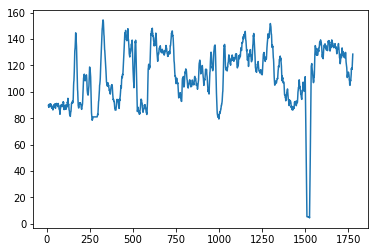

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
total_rewards_df= pd.DataFrame(total_rewards)
plt.plot(pd.rolling_mean(total_rewards_df, 10))

In [11]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act_eval(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_rewards.append(reward)
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            episodes.append(i_episode)
#             total_rewards.append(agent.reward)
#             final_score.append(agent.score)
#             print("\rEpisode = {:4d}, score = {:7.3f}".format(
#                 i_episode, agent.score), end="")  # [debug]
            break

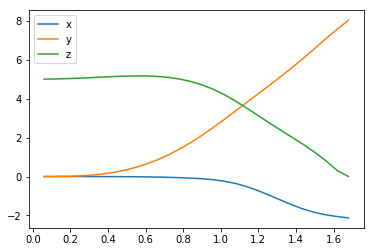

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

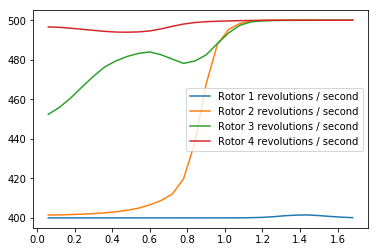

In [13]:

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

I decided to plot and check rewards and performance during and after training of all my runs and trials.

Se above for the metrics measured. Measures of the reward, and comments on what I believe to be happening with all of them.

## Comment on the files in the folder for ease of review

In terms of looking through the various experimentation from these last number of iterations the files age is generally actor_b, actor_c, actor_d' actor, actor_redo, actor_redo_a, going from oldest to latest. Same applies for the other class files etc.

Following this comment, I ran another training run which can be seen above using actor_b, critic_b, and task_e

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

In my various experimenting with the quadcopter of the last couple of weeks I varied my task quite a lot to experiment and see what the effects are. Although I experimented significantly over the last few weeks I did not capture all results in this notebook. Only capturing my last number of iterations and experimentation. A summary of the tasks I trialed with comments are below:

 - I first trialed the standard negative sum of distance from a fixed point as per the course material. This did not give great performance, but was early on with the simpler architectures.
 - I then shifted from using the sum of distances from a fixed point to using the negative Euler distance from a fixed point using np.linalg.norm(a - b). This then created a steadily varying reward away from the fixed point in all x, y, and z directions.
 - Following trials I found the quad would crash before episode completion, so I found that limiting the reward to between -1 and 1 may help, so I created the reward function as the negative tanh of the Euler distance. This means that at the fixed point [0, 0, 10] the error would be 0, and then increase to a max of -1. I used -tanh(0.2*Euler) as the reward so the error would increase to -1 at approx 10m distance from the target point.
 - Following that I tried to use a reward function which would add reward when near the fixed target point, and remove reward when further from the fixed point. For this I used 1-2*tanh(0.2*Euler). This is shown nearer the top of the notebook and repeated below for convenience. This reward function would add up to 1 when at the target point, and remove up to 1 when further away from the target point. As can be seen below the reward is 1 at target, 0 near approx 5m and negative 1 nearer 10m. The reward function below has been shown only for the points at height 10m, but will vary the same in all directions in a sphere.
 - With all these attempts at staying at a fixed point and giving negative rewards the quadcopter got very good at flipping over rapidly then crashing to the ground seemingly to minisime the negative reward (a local max, and not the global max of sitting at the target point). So following this I added rewards tied to the sim.time, so that additional reward would be added the longer the copter stayed in the air without crashing.I also put various combinations of punishment for if the copter crashed before the allotted time. The reward function then became a rough combination of reward = sim.time-2*tanh(0.2*Euler), and if done and sim.time < sim.runtime: reward -= 10.
 - What I found with all these reward function iterations is that the copter would start initialised with low action values, therefore the rotors would be even, the copter would last the full 5 seconds and accumulate large negative reward, but then after a while would learn to roll over rapidly and crash to maximise total reward. In a way being successful, but not in the way I wanted
 - I then switched from trying to hover in one spot and trialed restricting the reward to only be tied to the z direction and add an element for z velocity thereby switching to a takeoff tast. This was a much simpler task, and the copter would very quickly learn to maximise reward by shooting up into the air from a low starting position.
 - I then tried to make the reward more complex again by adding an element of vertical velocity for the first second, then switch to the hover task with Euler distance. When adding the Euler distance in for the hover task the copter would go back to crashing to maximise reward by not getting the negative Euler reward.
 
In the task I experimented not only with the reward function, but also with the other parameters. I initially started by following the DDPG paper architecture and added improvements from a number of other papers. This meant that I initially used 5 for the action repeat instead of 3 (I changed back after repeated lack of successes). I also attempted to add sim.time into the state function to be trained on, but then removed this after having difficulties.

I also trialed many experiments with changing the action range from 0-900, to 100-800, to 250-650, to 300-500. I found that the quad copter is very sensitive to differences in rotor velocity, this way the differences in rotor velocity are capped.

I keep having other ideas to improve the network and training, but this will be too time consuming (I have alsready spent significantly more time on this project than others) and I can experiment on without the deadline.

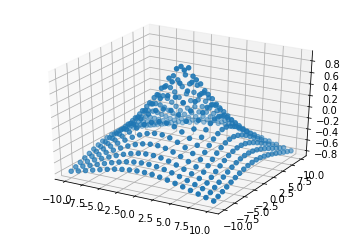

In [12]:
def reward_func(x, y):
    return 1-2*np.tanh(0.1*np.sqrt(x ** 2 + y ** 2)) 
        

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)
Z = np.array(reward_func(X, Y))

test = np.array([0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
plt.show()

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?

Initially I used all the same architecture and hyperparameters as the original DDPG paper which meant I used Adam optimizer with learning rate = 0.0001, tau for weight updates of 0.005 (from an imporvement paper), but I also used tau of 0.001 from the paper. I assumed using/copying the original paper would give me the best chance of succeding in the task without too much experimentation required. Most of my experimenting used the original paper, but with struggles to get the hover working I tried different architectures and learning.
I used huber loss instead of mean square error to reduce the gradient in the parameter updates. I used gradient clipping in the optimizer of between -0.5 and 0.5, and I used clipnorm=1 on the gradients too. Although the training parameters were as per the paper and should have been good the results of the quadcopter flight were not what I was after, and there were soooo many variable to experiment with to efficiently run test to each variable would take months of my time.

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

My final choise of hyperparamets for the hover task reward function were as per the DDPG paper (implementation here which was used as a guide - https://github.com/pemami4911/deep-rl/tree/master/ddpg) and another paper I found which was for improvements to DDPG.This improvements paper used batch size of 200 instead of 64, used a different tau, and took advantage of the symetry of the action and state space to double up the samples to use in the batch. Although the 'flip' symmetry would have been good, I did not have time to implement it in my experimentation.

- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

 - I used keras as the base for the neural nets starting with the course notes for guidance I updated it to start with the DDPG net architectures. I updated the actor and critic nets to use hidden sizes of 400 and 300 before final output layer. For the action inputs I input them into the 300 deep layer. I used relu activations throghout and changed the final action output activation to tanh from sigma to match the paper. This meant to put the actions back to range I used layers.Lambda(lambda x: (x * (self.action_range - 100) / 2) + self.action_low + self.action_range / 2). This meant that an output of -1 would out to the lower bound of actions, and 1 would out to the upper bound of actions with 0 at the mid point.
 - With the rotor velocities exploding out to max and min values with not much in between I also trialled using the square root of the absolute raw_action before converting back to action. This had the effect of favouring values in the middle range nearer 0 which I found worked quite well and smoothed off the rotor velocities (np.sign(actions)*np.sqrt(np.abs(actions)) * self.action_range / 2) + self.action_low + self.action_range / 2).
 - I also trialled adding additional layers so that the actions have another layer before being added to the states.
 - I trialled adding the action and stated nets when combining for the merge, and also trialled concatenating the nets when merging the layers.
 I trialled batch size of 200. I switched back to 64 as then it was faster to see trial results between episodes and faster to get through episodes.
 - I tried changing from relu to elu as per a paper I read on improvements.
 - I tried mean square error as well as huber loss.
 - I added batch norm to all the layer in the net to aid training which was suggested in the literature.
 - To assist exploration I experimented with starting the copter around the target point and away from the target point. I also did a number of iterations randomising the starting point of the copter normalised around the starting position and around the target point.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Was it an easy task?

 - The task in setting up the networks was relatively easy, but overall the project is very difficult (and time consuming!). The number of unknows and variables is broad, and the learning is so variable (compared to CNNs etc) that it is difficult to know what changes are making improvements and what aren't. Also in order to test the variables (reward formula, training hyperparameters, noise, network architecture etc. . .) requires a lot of iteration.
 - The take off task when I attempted that ended up being significantly easier than the hover task I made many attempts at. When doing the takeoff the copter learnt to shoot into the air. With the hover it was much more difficult to settle at a point in space.

Was there a gradual learning curve, or aha moment?
 - The learning curves varied between gradual and aha moments. With earlier attempts the reward would start relatively low and then step up at approx 300 iterations and settle/plateau on a maximum.
 - For my last attempt going back to the hover task and the DDPG network the total reward was gradually climbing up. It started around 70 at the start, gradually climbed to 100 at 700 iterations and climbed up to approx 140 toward the end of training.

How good was the final performance?

 - The final performance of my takeoff copter was good as it learnt very quickly and would shoot into the air and last the full time.
 - The final performance of my hover copter was good relative to the training iteration reward as it managed to grow the reward from 70 up to the final average of approx 140.
 - In terms of flight however the hover copter doesn't look too good flight wise. It doesn't hover at the fixed point as I would hope my helicopter would do.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

What was the hardest part of the project?

 - Initially reviewing the literature and getting what elements/classes did what, and what class attributes there were took a little while, but same as anything new.
 - The plotting element for rewards and flight performance wasn't too hard (relative to the other elements).
 - By far the hardest and most time consuming part of the project was specifying the task and experimenting/iterating in order to test and improve variables. The number of variables which can be tweaked (reward, architectue, hyperparameters . . .) means that there were a lot of combinations to be test. To add to the difficulty of the number of variables was the fact that the actor critic method has a lot of variability when learning and is not an easy monitored training like with CNNs etc. Also adding to the difficulty is the sensitivity of the copter to differences in rotor speed on stability.
 - I found that the starting state of the copter before training was ofter very good as the rotor values were range bound tightly to the centre of the action range meaning the copter was relatively stable. As the parameters would be trained the copter would use more of the action range and become more unstable and crash more. This could be sorted by tightening up the allowable action range, but this feels like cheating and should be learnt itself.
 - Reviewing literature and many of the Openai training runs etc. used 500000 training iterations etc. which would be way too time consuming for this, but with more time may be fun to try out and see if the copter settles into a better policy.